In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
train = pd.DataFrame(columns = ['label','path'])
test = pd.DataFrame(columns = ['label', 'path'])

In [4]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths = dirname.split('/')
        batch = paths[-2]
        label = paths[-1]
        file_path = os.path.join(dirname,filename)
        
        dic = {'label': label, 'path': file_path}
        if batch == 'test':
            test.loc[len(test)] = dic
            
        elif batch == 'train':
            train.loc[len(train)] = dic

In [5]:
test.sample(5)

,label,path
98,muffin,/kaggle/input/muffin-vs-chihuahua-image-classi...
521,muffin,/kaggle/input/muffin-vs-chihuahua-image-classi...
373,muffin,/kaggle/input/muffin-vs-chihuahua-image-classi...
673,chihuahua,/kaggle/input/muffin-vs-chihuahua-image-classi...
642,chihuahua,/kaggle/input/muffin-vs-chihuahua-image-classi...


In [6]:
train.sample(5)

,label,path
476,muffin,/kaggle/input/muffin-vs-chihuahua-image-classi...
3610,chihuahua,/kaggle/input/muffin-vs-chihuahua-image-classi...
81,muffin,/kaggle/input/muffin-vs-chihuahua-image-classi...
2544,chihuahua,/kaggle/input/muffin-vs-chihuahua-image-classi...
172,muffin,/kaggle/input/muffin-vs-chihuahua-image-classi...


Text(0.5, 1.0, 'Muffin/Chihuahua in train set')

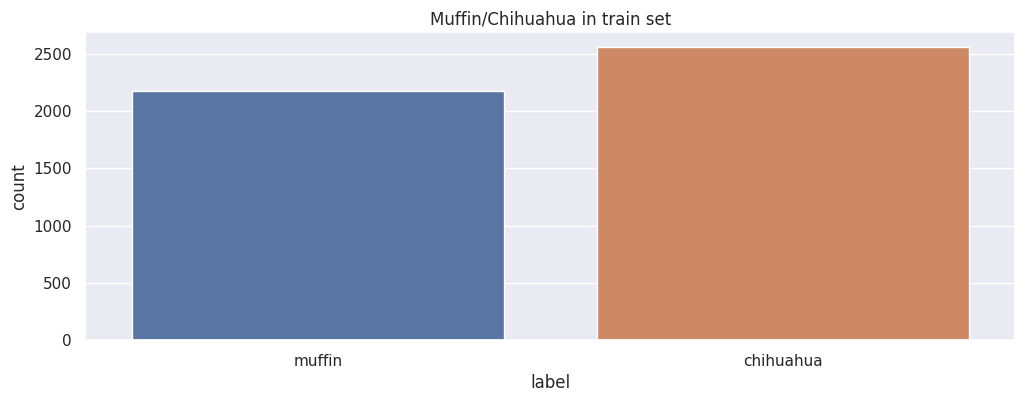

In [7]:
plt.figure(figsize = (12,4))
sns.countplot(data = train, x = 'label')
plt.title("Muffin/Chihuahua in train set")

Text(0.5, 1.0, 'Muffin/Chihuahua in test set')

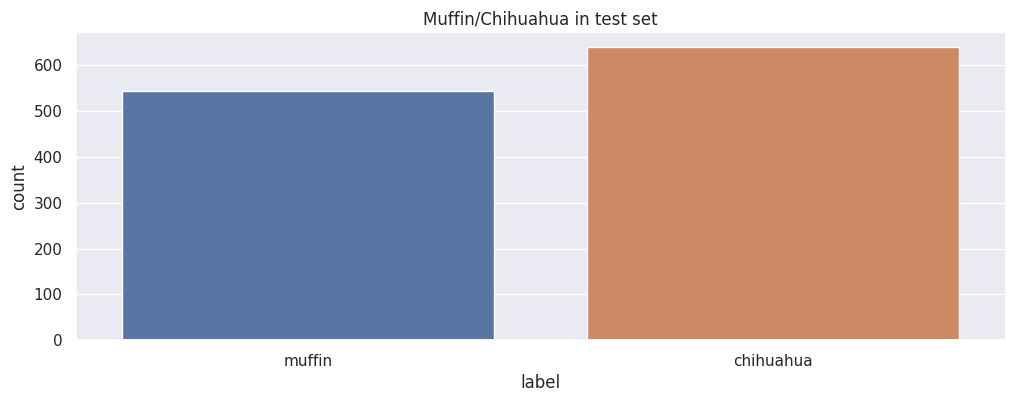

In [8]:
plt.figure(figsize = (12,4))
sns.countplot(data = test, x = 'label')
plt.title("Muffin/Chihuahua in test set")